<div style="text-align: center; margin-bottom: 20px;">
    <h3 style="color: #666; font-weight: normal; letter-spacing: 2px;">CURSO SUPERIOR DE TECNOLOGIA EM CIÊNCIA DE DADOS - FATEC JUNDIAI - 2025</h3>
    <br>
    <h1 style="font-weight: bold; color: #333;">Uma Análise Comparativa de Algoritmos de Machine Learning</h1>
    <h2 style="font-size: 1.5em; color: #444;">Da Regressão Logística à Random Forest na Classificação do Dataset SDSS DR17</h2>
    <br>
    <hr style="border: 1px solid #eee; width: 60%;">
    <br>
    <p style="font-size: 1.1em; line-height: 1.6;">
        <strong>Autores:</strong><br>
        André Santos de Oliveira<br>
        Guilherme Esteves Marret<br>
        Gustavo Henrique Bueno<br>
        Sofia Costa Seijas Pena<br>
        Thiago Macedo Vaz
    </p>
</div>

# Introdução

Este projeto dedica-se à classificação automatizada de objetos celestes — **Estrelas, Galáxias e Quasares** — utilizando o abrangente conjunto de dados do **Sloan Digital Sky Survey (SDSS DR17)**. A partir de 100.000 observações de domínio público, exploramos variáveis físicas determinantes, como as bandas fotométricas ($u, g, r, i, z$) e o *redshift*, separando-as de metadados puramente técnicos para alimentar modelos preditivos. O objetivo é demonstrar como características espectrais distintas permitem a categorização precisa dessas três entidades fundamentais do cosmos, unindo a astronomia observacional moderna a técnicas de Ciência de Dados, possibilitando que façamos a comparação do desempenho de três modelos de classificação: **Regressão Logística, Decision Tree e Random Forest**

## Classificação Estelar com SDSS DR17

A classificação de objetos celestes é a pedra angular da astronomia moderna. Desde a descoberta histórica de que Andrômeda é uma "ilha cósmica" separada da Via Láctea, nossa capacidade de mapear o universo expandiu-se exponencialmente com telescópios cada vez mais potentes.

Este projeto utiliza dados do **Sloan Digital Sky Survey (SDSS)**, um dos levantamentos astronômicos mais ambiciosos da história, para automatizar a distinção entre três entidades fundamentais do cosmos:
* **Estrelas:** Fontes pontuais de luz dentro da nossa galáxia.
* **Galáxias:** Aglomerados massivos de estrelas, gás e poeira.
* **Quasares (QSO):** Núcleos galácticos ativos e extremamente luminosos, alimentados por buracos negros supermassivos.

### Sobre o Dataset
O conjunto de dados contém **100.000 observações** do Data Release 17 (DR17). Cada registro é composto por 17 atributos (features) e 1 variável alvo (`class`). Abaixo, o dicionário de dados organizado por natureza da variável:

#### 1. Propriedades Físicas (Features Preditivas)
Estas são as variáveis que carregam a informação física (luz e movimento) necessária para a classificação.

* **`u`, `g`, `r`, `i`, `z`:** As 5 bandas do sistema fotométrico do SDSS. Representam a resposta do telescópio a diferentes comprimentos de onda da luz:
    * *u (Ultraviolet)* | *g (Green/Verde)* | *r (Red/Vermelho)* | *i (Near Infrared/Infravermelho Próximo)* | *z (Infravermelho)*.
* **`redshift` (Desvio para o Vermelho):** A medida de como o comprimento de onda da luz foi "esticado" devido à expansão do universo. É o principal indicador de distância e velocidade de recessão (essencial para identificar Quasares).
* **`alpha`**: Ascensão Reta (coordenada angular, análoga à longitude terrestre).
* **`delta`**: Declinação (coordenada angular, análoga à latitude terrestre).

#### 2. Metadados e Identificadores (Features de Controle)
Variáveis técnicas usadas pelo SDSS para catalogação e rastreamento. Geralmente não possuem valor preditivo para modelos de Machine Learning.

* **`obj_ID`**: Identificador único do objeto no catálogo de imagens (CAS).
* **`spec_obj_ID`**: Identificador único do espectro óptico utilizado.
* **`run_ID`**: Número da varredura (scan) específica onde a imagem foi capturada.
* **`rerun_ID`**: Código do processamento da imagem.
* **`cam_col`**: Coluna da câmera (linha de varredura) dentro da execução.
* **`field_ID`**: Identificador do campo específico de observação.
* **`plate`**: ID da placa física de alumínio usada no telescópio para posicionar as fibras ópticas.
* **`fiber_ID`**: ID da fibra óptica específica que capturou a luz do objeto.
* **`MJD` (Modified Julian Date)**: A data exata da observação.

#### 3. Variável Alvo
* **`class`**: A classificação espectral do objeto (**GALAXY**, **STAR** ou **QSO**).

***

### Referências

SORIANO, F. (fedesoriano). **Stellar Classification Dataset - SDSS17**. Kaggle, jan. 2022. Disponível em: <https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17>. Acesso em: 04 dez. 2025.

### Agradecimentos e Licença de Uso

Os dados disponibilizados pelo **Sloan Digital Sky Survey (SDSS)** são de domínio público e foram extraídos do *Data Release 17* (DR17). Agradecemos à colaboração SDSS por tornar este vasto catálogo acessível à comunidade científica e ao público em geral.

Para mais detalhes sobre a política de uso de dados e imagens, consulte a [Galeria de Imagens e Licença do SDSS](http://www.sdss.org/science/image-gallery/).

**Referência da Publicação (DR17):**

> Abdurro’uf et al., *The Seventeenth Data Release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA*. (Submetido ao ApJS). [arXiv:2112.02026]

# Imports e Configuração

O bloco de importações estabelece a infraestrutura completa para o pipeline de Machine Learning, começando pelas bibliotecas fundamentais para manipulação de dados e visualização (Pandas, NumPy, Matplotlib e Seaborn) e avançando para o ecossistema Scikit-Learn, onde selecionamos os três classificadores centrais do estudo: **Regressão Logística**, **Árvore de Decisão** e **Random Forest**. Além dos modelos, o código incorpora ferramentas essenciais de pré-processamento, como o `StandardScaler` para normalização das variáveis físicas (crucial para a regressão) e o `LabelEncoder` para a variável alvo, juntamente com métodos robustos de validação cruzada (`StratifiedKFold`) e métricas de avaliação detalhadas, garantindo que a comparação de performance seja estatisticamente rigorosa e reprodutível.

In [1]:
# Configuração Inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas e Processamento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuração visual
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregamento dados

O bloco de carregamento adota uma abordagem focada na **reprodutibilidade e integridade dos dados**, permitindo o acesso direto ao dataset via nuvem e eliminando a necessidade de uploads manuais locais. Um destaque técnico crucial é a definição explícita dos tipos (`dtype`) para os identificadores longos (`obj_ID` e `spec_obj_ID`) como *strings*; isso previne que o Pandas os interprete erroneamente como números, o que poderia truncar valores ou convertê-los para notação científica, enquanto a estrutura de tratamento de erros garante um feedback imediato e claro sobre o sucesso da conexão com a fonte dos dados.

In [2]:
# Carregar os dados

url = 'https://drive.google.com/uc?export=download&id=1rVlcI0TRs5ADXAoybbMuiF-Rdpuykg3_'

try:
    df = pd.read_csv(url, dtype={'obj_ID': str, 'spec_obj_ID': str})
    print("✅ Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("❌ Erro: Arquivo 'SDSS_data.csv' não encontrado. Verifique o caminho.")

✅ Arquivo carregado com sucesso!


# Verificação Inicial da Estrutura

O dataset apresenta uma estrutura técnica robusta e ideal para modelagem, contendo **100.000 observações completas** (sem valores nulos), o que elimina a necessidade de etapas complexas de imputação de dados. A predominância de tipos numéricos (15 das 18 colunas são `float64` ou `int64`) facilita a ingestão pelos algoritmos de Machine Learning, onde as variáveis `float64` carregam as informações físicas cruciais (como os filtros fotométricos `u, g, r, i, z` e o `redshift`), enquanto os inteiros e objetos (como `obj_ID`) atuam majoritariamente como metadados de controle. Além disso, com um consumo de memória de apenas **13.7 MB**, o conjunto é leve o suficiente para ser processado rapidamente na maioria dos ambientes de desenvolvimento locais ou em nuvem.

In [3]:
# Verificação Inicial da Estrutura
print(f"\nDimensões do Dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

print("\n--- Informações Técnicas e Tipos de Dados ---")
df.info()

print("\n--- Amostra dos Dados (Primeiras 5 linhas) ---")
display(df.head())

# Verificação rápida de valores nulos
missing_values = df.isnull().sum().sum()
print(f"\nTotal de valores nulos no dataset: {missing_values}")


Dimensões do Dataset: 100000 linhas x 18 colunas

--- Informações Técnicas e Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  object 
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  object 
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          1

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6543777369295181824,GALAXY,0.634794,5812,56354,171
1,1237664879951151360,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,11760142036707334144,GALAXY,0.779136,10445,58158,427
2,1237660961330430208,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5152200256025548800,GALAXY,0.644195,4576,55592,299
3,1237663478724297984,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,10301071412954421248,GALAXY,0.932346,9149,58039,775
4,1237680272041378048,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6891864880783316992,GALAXY,0.116123,6121,56187,842



Total de valores nulos no dataset: 0


# Higienizando o dataset

**Seleção de características (feature selection)** higienizando o dataset, ao remover colunas que funcionam apenas como metadados administrativos ou técnicos do telescópio (como IDs de objetos, datas de observação e números de placas). Essas variáveis não carregam nenhuma informação física sobre a natureza dos astros e, se mantidas, introduziriam **ruído** e risco de **vazamento de dados (data leakage)**, onde o modelo poderia erroneamente aprender a associar um ID específico a uma classe em vez de aprender os padrões espectrais reais (cor e redshift) necessários para a generalização.

In [4]:
# Remover colunas que são apenas identificadores
cols_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
df = df.drop(columns=cols_to_drop, errors='ignore')

print("Colunas removidas do DataFrame original:", cols_to_drop)
print("Novo DataFrame 'df_clean' criado com as seguintes colunas:")
print(df.columns.tolist())
print(f"Dimensões do df_clean: {df.shape[0]} linhas x {df.shape[1]} colunas")

Colunas removidas do DataFrame original: ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
Novo DataFrame 'df_clean' criado com as seguintes colunas:
['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']
Dimensões do df_clean: 100000 linhas x 9 colunas


# Limpeza dados ausentes (-9999)

Baseado na documentação de dados astronômicos e nas práticas do pipeline do SDSS, o valor -9999 é utilizado como uma sentinela (ou flag) para indicar dados ausentes, falha no processamento ou erro de medição. Como a maioria das variáveis físicas neste dataset (como fluxo luminoso e desvio para o vermelho) deve ser positiva ou estar dentro de faixas específicas, um número negativo de grande magnitude é inserido propositalmente para marcar observações onde o software do telescópio não conseguiu calcular um valor confiável (por exemplo, devido a saturação, objetos muito fracos ou bordas de imagem), garantindo que esses "buracos" não sejam confundidos com dados reais.

In [5]:
print("Tamanho original do DataFrame: ", df.shape)

# Identificar linhas que contêm -9999 em qualquer coluna
rows_to_drop = df[(df == -9999).any(axis=1)]

if not rows_to_drop.empty:
    # Excluir essas linhas do DataFrame
    df = df[~(df == -9999).any(axis=1)]
    print(f"Foram excluídas {len(rows_to_drop)} linhas contendo o valor -9999.")
    print("Novo tamanho do DataFrame: ", df.shape)
else:
    print("Nenhuma linha contendo o valor -9999 foi encontrada no DataFrame.")

Tamanho original do DataFrame:  (100000, 9)
Foram excluídas 1 linhas contendo o valor -9999.
Novo tamanho do DataFrame:  (99999, 9)


#Análise Exploratória (EDA: Exploratory Data Analysis)

## Distribuição das Classes

A análise da distribuição das classes revela um desbalanceamento acentuado no dataset, onde as **Galáxias (GALAXY)** constituem a classe majoritária absoluta com 59.445 observações (aproximadamente 60% do total), superando largamente as **Estrelas (STAR)** e **Quasares (QSO)**, que contam com 21.594 e 18.961 registros, respectivamente. Essa predominância alerta para o fato de que a simples acurácia global pode ser uma métrica enganosa — já que um modelo que previsse apenas "Galáxia" acertaria 60% das vezes sem aprender nada — tornando mandatória a utilização de estratégias de validação robustas, como a amostragem estratificada e a análise via Matriz de Confusão, para garantir que o classificador seja eficaz também na identificação dos objetos mais raros do catálogo.

Dados do  gráfico:
class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

Ordem das categorias (Index): ['GALAXY', 'STAR', 'QSO']
Valores numéricos (Values): [59445 21593 18961]


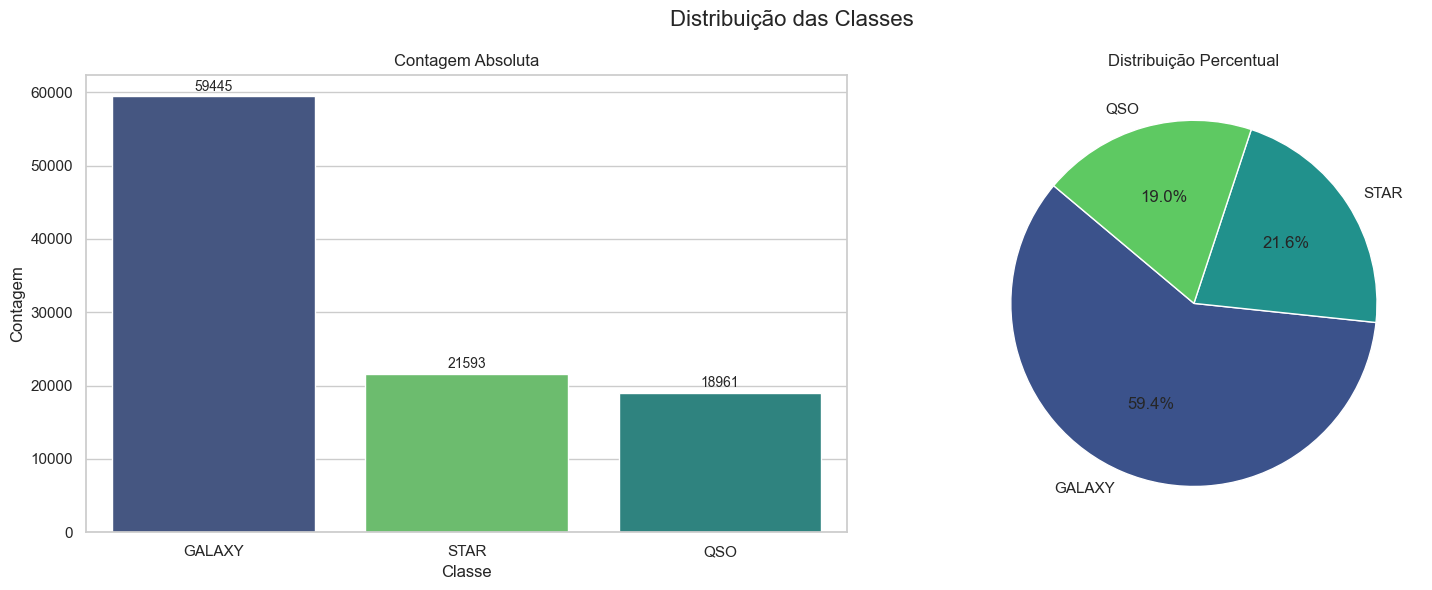

In [6]:
# Análise da Variável Alvo (Target)
counts = df['class'].value_counts()

print("Dados do  gráfico:")
print(counts)
print("\nOrdem das categorias (Index):", counts.index.tolist())
print("Valores numéricos (Values):", counts.values)

colors = sns.color_palette('viridis', len(counts))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribuição das Classes', fontsize=16)

# Gráfico 1: Barras
sns.countplot(x=df['class'], ax=ax1, order=counts.index, palette=colors, hue=df['class'], legend=False)

# CORREÇÃO: Iterar sobre todos os containers para rotular todas as barras
for container in ax1.containers:
    ax1.bar_label(container, fontsize=10, padding=2)

ax1.set(title='Contagem Absoluta', xlabel='Classe', ylabel='Contagem')

# Gráfico 2: Pizza
ax2.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor':'white'})
ax2.set_title('Distribuição Percentual')

plt.tight_layout()
plt.show()

## Distribuição de Redshift por Classe

As estatísticas descritivas do *redshift* validam matematicamente a física astronômica subjacente, revelando uma estratificação clara entre as classes: as **Estrelas (STAR)** comportam-se como objetos locais, apresentando valores de *redshift* virtualmente nulos (média de -0,0001 e desvio padrão ínfimo), o que indica que estão gravitacionalmente ligadas à nossa galáxia. Em contraste, os **Quasares (QSO)** confirmam-se como os objetos mais distantes e rápidos do universo observável, dominando a escala com uma média de 1,72 e atingindo máximos de 7,01, enquanto as **Galáxias (GALAXY)** ocupam uma zona intermediária (média de 0,42). Essa separação numérica distinta reforça o *redshift* como a *feature* preditiva mais crítica para o modelo, oferecendo uma fronteira de decisão quase perfeita para distinguir estrelas de objetos extragalácticos.

Estatísticas Descritivas do Redshift por Classe:


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
GALAXY,59445.0,0.421596,0.264858,-0.009971,0.164527,0.456274,0.594699,1.995524
QSO,18961.0,1.719676,0.913954,0.000461,1.106605,1.617232,2.220279,7.011245
STAR,21593.0,-0.000115,0.000465,-0.004136,-0.000295,-0.000076,0.000075,0.004153


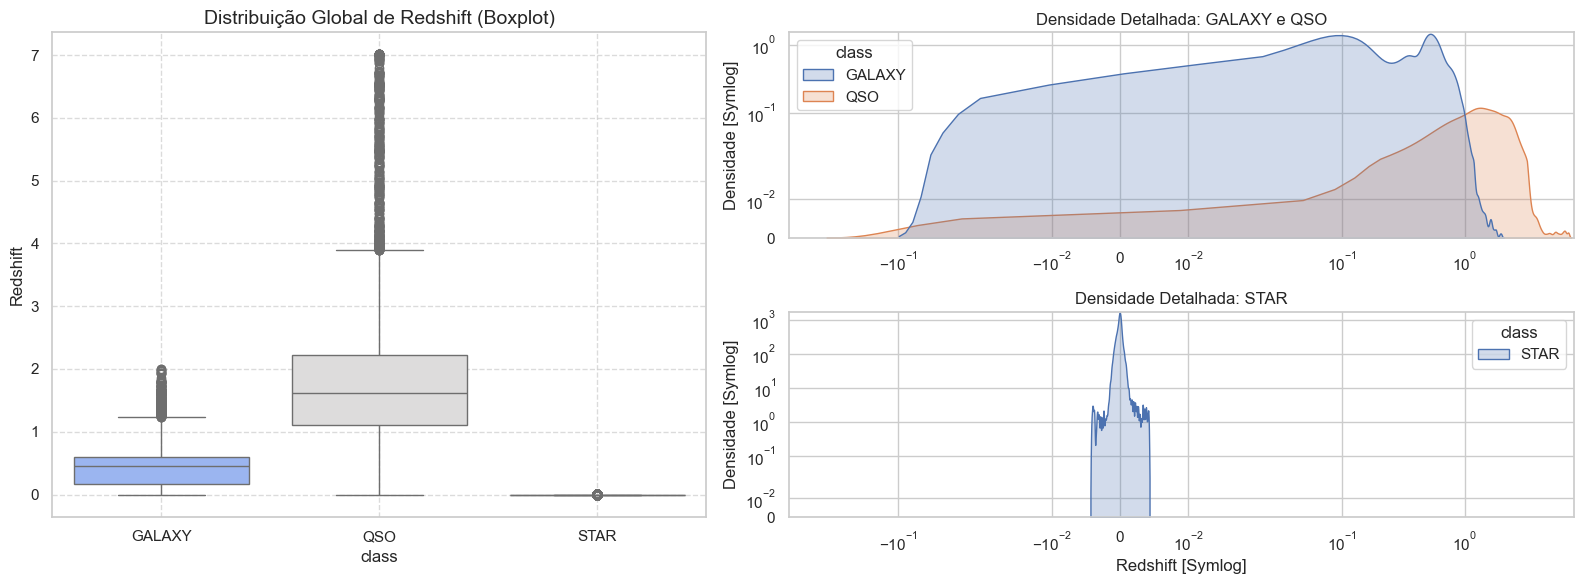

In [7]:
# 1. Exibir Estatísticas (Texto)
print("Estatísticas Descritivas do Redshift por Classe:")
display(df.groupby('class')['redshift'].describe())
print("\n")

# 2. Configuração do Layout Complexo
# GridSpec de 2 linhas x 2 colunas.
# width_ratios=[1, 1.2] dá um pouco mais de espaço horizontal para os gráficos de densidade (direita)
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[1, 1.2])

# Definindo os eixos (ax) baseados no Grid
ax_box = fig.add_subplot(gs[:, 0])      # Esquerda: Boxplot ocupa todas as linhas (:) da coluna 0
ax_kde_top = fig.add_subplot(gs[0, 1])  # Direita Topo: Linha 0, Coluna 1
ax_kde_btm = fig.add_subplot(gs[1, 1], sharex=ax_kde_top) # Direita Base: Linha 1, Coluna 1

# --- GRÁFICO 1 (Esquerda): Boxplot ---
sns.boxplot(x='class', y='redshift', data=df, palette='coolwarm', hue='class', legend=False, ax=ax_box)
ax_box.set_title('Distribuição Global de Redshift (Boxplot)', fontsize=14)
ax_box.grid(True, linestyle='--', alpha=0.7)
ax_box.set_ylabel('Redshift')

# --- GRÁFICO 2 (Direita): KDE Dividido ---
lin_threshold = 0.02 # Parâmetro de sensibilidade linear perto do zero

# Subplot Superior: GALAXY e QSO
sns.kdeplot(
    data=df[df['class'].isin(['GALAXY', 'QSO'])],
    x='redshift',
    hue='class',
    fill=True,
    common_norm=True,
    ax=ax_kde_top
)
ax_kde_top.set_title('Densidade Detalhada: GALAXY e QSO', fontsize=12)
ax_kde_top.set_xlabel('') # Remove label do meio para não poluir
ax_kde_top.set_ylabel('Densidade [Symlog]')
ax_kde_top.set_yscale('symlog', linthresh=lin_threshold) # Escala Y Symlog

# Subplot Inferior: STAR
sns.kdeplot(
    data=df[df['class'] == 'STAR'],
    x='redshift',
    hue='class',
    fill=True,
    common_norm=True,
    ax=ax_kde_btm
)
ax_kde_btm.set_title('Densidade Detalhada: STAR', fontsize=12)
ax_kde_btm.set_xlabel('Redshift [Symlog]')
ax_kde_btm.set_ylabel('Densidade [Symlog]')
ax_kde_btm.set_yscale('symlog', linthresh=lin_threshold) # Escala Y Symlog

# Aplica escala Symlog no Eixo X (compartilhado pelos gráficos da direita)
ax_kde_btm.set_xscale('symlog', linthresh=lin_threshold)

plt.tight_layout()
plt.show()

## Matriz de Correlação (Variáveis Físicas)

A Matriz de Correlação revela uma **multicolinearidade crítica** entre as bandas fotométricas — especificamente `u`, `g` e `z` possuem coeficientes quase perfeitos (>0.99) —, o que indica uma alta redundância de informação espectral que pode impactar a estabilidade de modelos lineares sem regularização. Em contrapartida, observa-se uma conexão física relevante entre o `redshift` e os filtros `r` (0.43) e `i` (0.49), validando o fenômeno astronômico onde objetos mais distantes e rápidos tendem a brilhar mais nessas frequências de onda mais longas. Por fim, a independência das coordenadas espaciais (`alpha`, `delta`) confirma que a posição no céu não influencia a natureza do objeto, enquanto os baixos coeficientes lineares para a variável `class` devem ser interpretados com cautela, pois refletem apenas a limitação do método de Pearson em capturar relações não-lineares de categorias codificadas (Galaxy, Star, Quasar).

Matriz de Correlação (Coeficientes de Pearson):


,alpha,delta,u,g,r,i,z,class,redshift
alpha,1.000000,0.138698,-0.000222,-0.014118,-0.022079,-0.023577,-0.025160,-0.011764,0.001671
delta,0.138698,1.000000,-0.026845,-0.007077,-0.006845,-0.004488,-0.006286,0.014474,0.031629
u,-0.000222,-0.026845,1.000000,0.853350,0.728681,0.618346,0.545760,-0.272681,0.166816
g,-0.014118,-0.007077,0.853350,1.000000,0.932996,0.847046,0.775302,-0.229703,0.318910
r,-0.022079,-0.006845,0.728681,0.932996,1.000000,0.962868,0.919114,-0.076754,0.433237
i,-0.023577,-0.004488,0.618346,0.847046,0.962868,1.000000,0.971546,0.015039,0.492381
z,-0.025160,-0.006286,0.545760,0.775302,0.919114,0.971546,1.000000,0.066738,0.501060
class,-0.011764,0.014474,-0.272681,-0.229703,-0.076754,0.015039,0.066738,1.000000,-0.054226
redshift,0.001671,0.031629,0.166816,0.318910,0.433237,0.492381,0.501060,-0.054226,1.000000


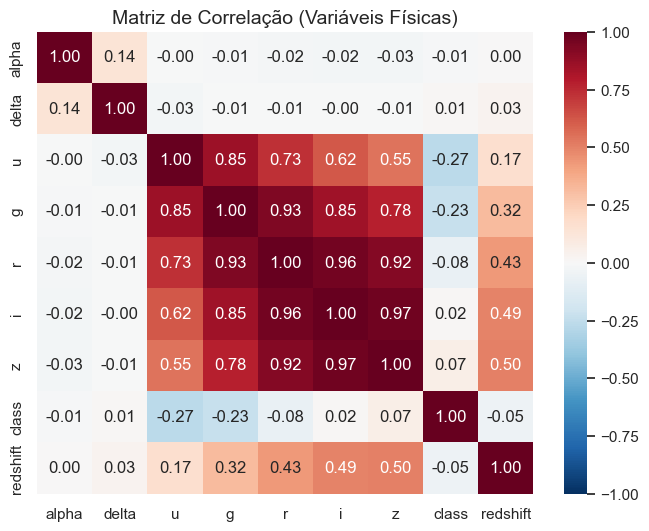

In [8]:
# Mapa de Calor de Correlações (Excluindo IDs)

# Removemos colunas de ID para ver apenas as correlações físicas
cols_not_physical = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']
df_physical = df.drop(columns=cols_not_physical, errors='ignore')

# Precisamos codificar a classe para ver a correlação dela com as outras variáveis
from sklearn.preprocessing import LabelEncoder
df_corr = df_physical.copy()
df_corr['class'] = LabelEncoder().fit_transform(df_corr['class'])

# 1. Tabela de dados
correlation_matrix = df_corr.corr()

print("Matriz de Correlação (Coeficientes de Pearson):")
display(correlation_matrix)
print("\n")

# 2. Gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Matriz de Correlação (Variáveis Físicas)', fontsize=14)
plt.show()

## Engenharia de features

A estratégia implementada baseia-se na aplicação de **Engenharia de Features** fundamentada em astrofísica para mitigar a severa multicolinearidade detectada anteriormente entre as bandas fotométricas originais. Ao criar **Índices de Cor** (como `u_g`, `g_r`, etc.), transformamos valores absolutos de magnitude — que eram altamente correlacionados — em taxas de variação espectral que descrevem a "temperatura" ou cor do objeto, mantendo apenas a banda `r` como referência de luminosidade total. Simultaneamente, a remoção de variáveis de ruído (IDs técnicos) e coordenadas espaciais irrelevantes (`alpha`, `delta`) limpa o espaço de características, resultando em um dataset mais enxuto e ortogonal, onde o modelo pode aprender padrões físicos reais (forma do espectro e distância) sem a confusão causada por redundâncias matemáticas ou dados posicionais aleatórios.

1. Criando Índices de Cor (Proporção de Fluxo)...
2. Removendo colunas de ID para ver apenas as correlações físicas...
3. Removendo coordenadas espaciais e bandas redundantes...

--- Novo Dataset (Pós-Engenharia) ---
Colunas restantes: ['r', 'class', 'redshift', 'u_g', 'g_r', 'r_i', 'i_z']


,r,class,redshift,u_g,g_r,r_i,i_z
0,20.39501,GALAXY,0.634794,1.60352,1.88029,1.22928,0.37202
1,22.58444,GALAXY,0.779136,1.94571,0.24744,1.41632,-0.44615
2,20.60976,GALAXY,0.644195,2.59918,2.05413,1.26119,0.40030
3,21.61162,GALAXY,0.932346,-1.63974,2.16494,1.10708,1.25444
4,16.49747,GALAXY,0.116123,1.85690,1.08281,0.52036,0.43250




4. Nova Correlação para validar a redução da multicolinearidade


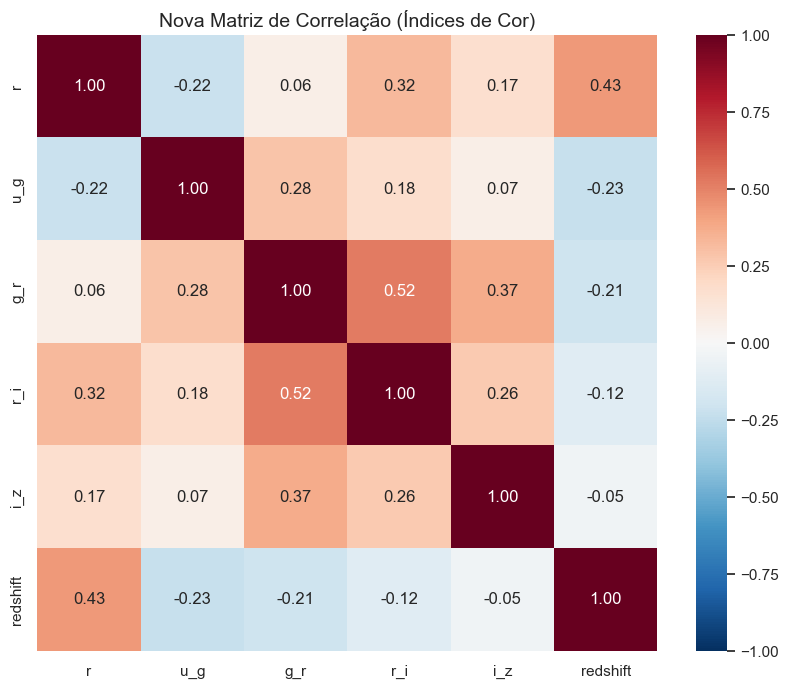

In [9]:
# ENGENHARIA DE FEATURES (Criação de Índices de Cor)

# Trabalhamos em uma cópia para preservar o carregamento original
df_eng = df.copy()

print("1. Criando Índices de Cor (Proporção de Fluxo)...")
# A física: (mag_A - mag_B) equivale a log(fluxo_B / fluxo_A)
df_eng['u_g'] = df_eng['u'] - df_eng['g']
df_eng['g_r'] = df_eng['g'] - df_eng['r']
df_eng['r_i'] = df_eng['r'] - df_eng['i']
df_eng['i_z'] = df_eng['i'] - df_eng['z']

# ------------------------------------------------------------------------------
# Decisão Estratégica sobre Multicolinearidade:
# Se mantivermos u,g,r,i,z E as novas cores, a multicolinearidade piora.
# A prática padrão é manter APENAS UMA banda de referência (geralmente 'r' ou 'g')
# para indicar o BRILHO TOTAL, e usar as cores para indicar o TIPO ESPECTRAL.
# ------------------------------------------------------------------------------

# Vamos manter 'r' como referência de luminosidade e remover as outras bandas brutas
cols_to_drop_bands = ['u', 'g', 'i', 'z']
df_eng = df_eng.drop(columns=cols_to_drop_bands)

print("2. Removendo colunas de ID para ver apenas as correlações físicas...")
# Removemos colunas de ID para ver apenas as correlações físicas
cols_not_physical = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']
df_eng = df_eng.drop(columns=cols_not_physical, errors='ignore')

print("3. Removendo coordenadas espaciais e bandas redundantes...")
# Removendo Alpha e Delta (Irrelevantes para classificação física)
cols_spatial = ['alpha', 'delta']
df_eng = df_eng.drop(columns=cols_spatial)

# Verificação do Resultado
print("\n--- Novo Dataset (Pós-Engenharia) ---")
print(f"Colunas restantes: {df_eng.columns.tolist()}")
display(df_eng.head())
print("\n")

print("4. Nova Correlação para validar a redução da multicolinearidade")
plt.figure(figsize=(10, 8))
# Selecionando apenas as numéricas para correlação
cols_analysis = ['r', 'u_g', 'g_r', 'r_i', 'i_z', 'redshift']
df_analysis = df_eng[cols_analysis].copy()

# Codificando class temporariamente apenas para o heatmap
#from sklearn.preprocessing import LabelEncoder
#df_analysis['class'] = LabelEncoder().fit_transform(df_analysis['class'])

sns.heatmap(df_analysis.corr(), annot=True, fmt=".2f", cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Nova Matriz de Correlação (Índices de Cor)', fontsize=14)
plt.show()

df = df_eng

# Treinamento dos Modelos

## Pré-processamento e Split

Este bloco de código materializa o pipeline de **pré-processamento e validação**, transformando dados brutos em matrizes matematicamente otimizadas para os algoritmos de Machine Learning. O processo inicia convertendo a variável alvo textual em números (`LabelEncoder`) e isolando as *features* preditivas, seguido pela aplicação do `StandardScaler` para normalizar as escalas das variáveis físicas (garantindo que a magnitude do brilho `r` não ofusque a sutileza do `redshift` apenas por ser um número maior). A etapa crucial é a divisão dos dados em 70% para treino e 30% para teste, onde o parâmetro **`stratify=y`** desempenha um papel fundamental: ele força a preservação estatística das proporções originais das classes, assegurando que o desbalanceamento natural do cosmos (muitas Galáxias, poucos Quasares) seja respeitado em ambos os conjuntos, evitando que o modelo seja treinado ou testado com uma amostra enviesada.

In [10]:
# Pré-processamento e Split
# 1. Encoding do Target ('class')
# Transforma as categorias 'GALAXY', 'STAR', 'QSO' em números (0, 1, 2)
le = LabelEncoder()
y = le.fit_transform(df['class'])

# Exibe o dicionário para referência futura
print("Classes mapeadas:", dict(zip(le.classes_, le.transform(le.classes_))))

# 2. Definição das Features (X)
# Removemos apenas a coluna alvo. Todas as outras (r, redshift, cores) são preditivas.
X = df.drop(columns=['class'])

# 3. Padronização (Scaling)
# Essencial pois 'redshift' (0 a 7) e 'r' (10 a 30) têm escalas diferentes.
# O Scaler coloca tudo na mesma magnitude (média 0, desvio padrão 1).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Divisão Treino/Teste (70/30)
# stratify=y é crucial aqui devido ao desbalanceamento (muitas Galáxias vs poucos Quasares)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 5. Validação das Dimensões
print("-" * 30)
print(f"Features selecionadas: {X.columns.tolist()}")
print(f"Dataset de Treino: {X_train.shape[0]} amostras")
print(f"Dataset de Teste:  {X_test.shape[0]} amostras")

Classes mapeadas: {'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}
------------------------------
Features selecionadas: ['r', 'redshift', 'u_g', 'g_r', 'r_i', 'i_z']
Dataset de Treino: 69999 amostras
Dataset de Teste:  30000 amostras


# Treinamento, Cross-Validation e Avaliação Comparativa

A análise dos resultados consolida o **Random Forest** como o classificador definitivo para este problema, atingindo o pico de performance com **98,00% de acurácia média** na validação cruzada e demonstrando uma robustez excepcional com desvio padrão ínfimo (0,0010). É notável a estabilidade do algoritmo frente à variação de hiperparâmetros, onde o aumento de 50 para 200 árvores trouxe ganhos marginais, indicando uma rápida convergência do modelo. Comparativamente, as **Árvores de Decisão** revelaram que a poda excessiva (`max_depth=2`) prejudica a generalização (caindo para 94,7%), embora uma profundidade de apenas 4 níveis já capture a maior parte do sinal preditivo (96,68%). Por fim, a consistência quase perfeita entre os resultados do *split* 70/30 e da validação cruzada confirma que o dataset é estatisticamente homogêneo, enquanto o *baseline* de **Regressão Logística** (95,6%) valida a eficácia da engenharia de atributos, provando que a separabilidade das classes é alta, mas que a capacidade não-linear do *ensemble* é necessária para capturar as nuances finais dos espectros estelares.

In [11]:
# 5. BATERIA DE TESTES COMPLETA (BASELINE VS CROSS-VALIDATION)

# Configurações Globais
cv_k = 10 # K-folds
skf = StratifiedKFold(n_splits=cv_k, shuffle=True, random_state=42)

# Lista de Cenários: (Nome para a Tabela, Modelo Configurado, Tipo de Teste)
# Tipos de Teste: 'split' (usa X_train/X_test) ou 'cv' (usa X_scaled/y com Cross-Validation)
scenarios = [
    # --- GRUPO 1: Baseline (Split 70/30) ---
    ("Regressao Logistica (Baseline 70/30)", LogisticRegression(max_iter=1000, random_state=42), 'split'),
    ("Árvore de Decisão (Baseline 70/30)", DecisionTreeClassifier(random_state=42), 'split'),
    ("Árvore de Decisão (Poda max_depth=4)", DecisionTreeClassifier(max_depth=4, random_state=42), 'split'),
    ("Árvore de Decisão (Poda max_depth=3)", DecisionTreeClassifier(max_depth=3, random_state=42), 'split'),
    ("Árvore de Decisão (Poda max_depth=2)", DecisionTreeClassifier(max_depth=2, random_state=42), 'split'),
    ("Random Forest (Baseline 70/30)", RandomForestClassifier(n_estimators=100, random_state=42), 'split'),
    ("Random Forest (Baseline n=200)", RandomForestClassifier(n_estimators=200, random_state=42), 'split'),
    ("Random Forest (Baseline n=50)", RandomForestClassifier(n_estimators=50, random_state=42), 'split'),

    # --- GRUPO 2: Cross Validation (k=10) ---
    ("Regressao Logistica (Cross Validation)", LogisticRegression(max_iter=1000, random_state=42), 'cv'),
    ("Árvore de Decisão (Cross-Validation)", DecisionTreeClassifier(random_state=42), 'cv'),
    ("Árvore de Decisão (CV max_depth=4)", DecisionTreeClassifier(max_depth=4, random_state=42), 'cv'),
    ("Árvore de Decisão (CV max_depth=3)", DecisionTreeClassifier(max_depth=3, random_state=42), 'cv'),
    ("Árvore de Decisão (CV max_depth=2)", DecisionTreeClassifier(max_depth=2, random_state=42), 'cv'),
    ("Random Forest (Cross-Validation)", RandomForestClassifier(n_estimators=100, random_state=42), 'cv'),
    ("Random Forest (CV n=200)", RandomForestClassifier(n_estimators=200, random_state=42), 'cv'),
    ("Random Forest (CV n=50)", RandomForestClassifier(n_estimators=50, random_state=42), 'cv'),
]

results_data = []

print(f"## Iniciando Bateria de Testes ({len(scenarios)} cenários) ##")
print("Aguarde, processando Cross-Validation pode demorar um pouco...\n")

for name, model, method in scenarios:
    print(f"⚙️ Processando: {name}...", end=" ")

    acc_mean = 0.0
    acc_std = np.nan # Padrão para Split é NaN

    if method == 'split':
        # Treino e Teste Simples (Hold-out)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc_mean = accuracy_score(y_test, preds)
        print(f"✅ Ok (Acc: {acc_mean:.4f})")

    elif method == 'cv':
        # Validação Cruzada
        # Usa X_scaled e y (todo o dataset)
        scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy', n_jobs=-1)
        acc_mean = scores.mean()
        acc_std = scores.std()
        print(f"✅ Ok (Média: {acc_mean:.4f})")

    # Adicionar ao array de resultados
    results_data.append({
        "modelo": name,
        "acuracia_media": acc_mean,
        "desvio_padrao": acc_std
    })

# --- Geração da Tabela Final ---
df_results_final = pd.DataFrame(results_data)

print("\n--- Tabela de Comparação de Modelos (Atualizada) ---")
# Formatação para exibir NaN corretamente e números arredondados
pd.set_option('display.max_colwidth', None)
display(df_results_final)

## Iniciando Bateria de Testes (16 cenários) ##
Aguarde, processando Cross-Validation pode demorar um pouco...

⚙️ Processando: Regressao Logistica (Baseline 70/30)... ✅ Ok (Acc: 0.9562)
⚙️ Processando: Árvore de Decisão (Baseline 70/30)... ✅ Ok (Acc: 0.9674)
⚙️ Processando: Árvore de Decisão (Poda max_depth=4)... ✅ Ok (Acc: 0.9658)
⚙️ Processando: Árvore de Decisão (Poda max_depth=3)... ✅ Ok (Acc: 0.9558)
⚙️ Processando: Árvore de Decisão (Poda max_depth=2)... ✅ Ok (Acc: 0.9480)
⚙️ Processando: Random Forest (Baseline 70/30)... ✅ Ok (Acc: 0.9796)
⚙️ Processando: Random Forest (Baseline n=200)... ✅ Ok (Acc: 0.9796)
⚙️ Processando: Random Forest (Baseline n=50)... ✅ Ok (Acc: 0.9796)
⚙️ Processando: Regressao Logistica (Cross Validation)... ✅ Ok (Média: 0.9560)
⚙️ Processando: Árvore de Decisão (Cross-Validation)... ✅ Ok (Média: 0.9674)
⚙️ Processando: Árvore de Decisão (CV max_depth=4)... ✅ Ok (Média: 0.9668)
⚙️ Processando: Árvore de Decisão (CV max_depth=3)... ✅ Ok (Média: 0.9551)
⚙️ 

,modelo,acuracia_media,desvio_padrao
0,Regressao Logistica (Baseline 70/30),0.956233,NaN
1,Árvore de Decisão (Baseline 70/30),0.967433,NaN
2,Árvore de Decisão (Poda max_depth=4),0.965767,NaN
3,Árvore de Decisão (Poda max_depth=3),0.955800,NaN
4,Árvore de Decisão (Poda max_depth=2),0.948033,NaN
5,Random Forest (Baseline 70/30),0.979567,NaN
6,Random Forest (Baseline n=200),0.979600,NaN
7,Random Forest (Baseline n=50),0.979600,NaN
8,Regressao Logistica (Cross Validation),0.956010,0.001809
9,Árvore de Decisão (Cross-Validation),0.967430,0.002130


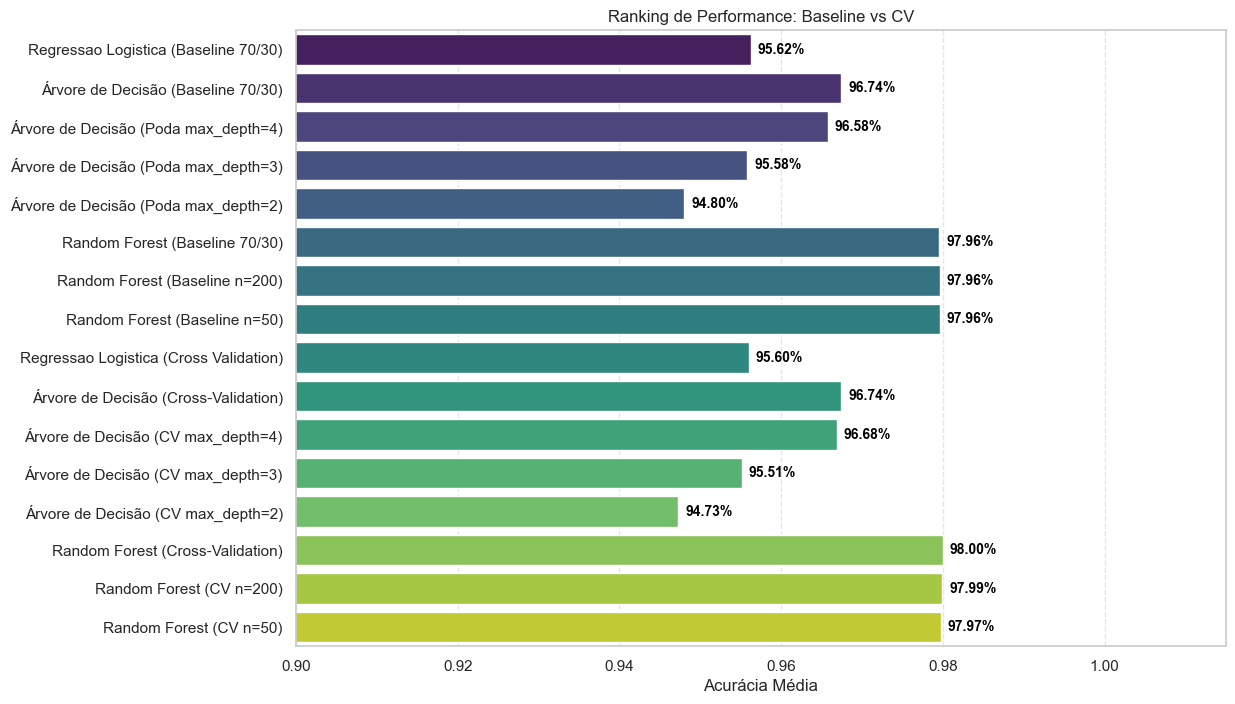

In [12]:
# Visualização Gráfica Rápida
plt.figure(figsize=(12, 8))

# 1. Atribuímos o gráfico a 'ax' para poder manipular as barras depois
ax = sns.barplot(
    data=df_results_final,
    y='modelo',
    x='acuracia_media',
    palette='viridis',
    hue='modelo',
    legend=False
)

# Ajuste do limite para dar espaço ao texto na direita (de 0.90 até 1.015)
plt.xlim(0.90, 1.015)
plt.title("Ranking de Performance: Baseline vs CV")
plt.xlabel("Acurácia Média")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# --- INSTRUÇÃO PARA OS RÓTULOS ---
# O 'ax.containers' contém as barras desenhadas.
# Iteramos sobre elas para calcular a porcentagem e escrever o texto.
for container in ax.containers:
    # Criamos uma lista de textos formatados: (Valor * 100) com 2 casas decimais + '%'
    # Se quiser vírgula em vez de ponto, use: f'{val*100:.2f}%'.replace('.', ',')
    labels = [f'{val*100:.2f}%' for val in container.datavalues]

    # Adiciona o rótulo ao final de cada barra
    ax.bar_label(container, labels=labels, padding=5, fontsize=10, fontweight='bold', color='black')

plt.show()